# 신용거래 이상탐지 데이터 다루기
---
이전 시간에 배웠던 Feature Engineering을 바탕으로 기존의 fraud 데이터에서 사기여부를 예측하기 위한 데이터로 정제해본다.

## 데이터 불러오기

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로 수정
import os
print('os.getcwd():',os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks/[M3]Data_Preprocessing')
print('os.getcwd():',os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
os.getcwd(): /content
os.getcwd(): /content/drive/MyDrive/Colab Notebooks/[M3]Data_Preprocessing


In [3]:
# 데이터 불러오기
fraud = pd.read_csv('Data/fraud.csv')

In [4]:
# 데이터 확인
pd.set_option('display.max_columns', 50)
fraud.info()
display(fraud.head(3))
display(fraud.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
491133,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


### 데이터의 구조
- 데이터는 491134개로 구성되어 있다.
- 총 22개의 피처가 있다.
- 각 피처가 의미하는 것은 아래와 같다.
```
trans_date_trans_time  거래일시
cc_num                 신용카드 번호
merchant               거래장소
category               분류
amt                    거래금액
first                  이름
last                   성
gender                 성별
street                 도로명
city                   도시
state                  주
zip                    우편번호
lat                    고객주소(위도)
long                   고객주소(경도)
city_pop               도시인구
job                    직업
dob                    생년월일
trans_num              거래번호
unix_time              경과시간(unix,초)
merch_lat              거래장소의 위도
merch_long             거래장소의 경도
is_fraud               사기여부
```
- 거래발생일시와 생년월일 컬럼이 문자열이다. 연산을 위해 datetime으로 변환할 필요가 있어보인다.
- 데이터에서 결측치는 없어보인다. 혹시나 문자열로 'null', 'NaN'으로 저장된 결측치가 있으니 다음 단계에서 확인해본다.

### 피처명 수정
---
주어진 피처명들의 의미가 직관적으로 와닿도록 다음과 같이 수정해준다.
```
거래일시: trans_date_trans_time -> payment_time
신용카드 번호: cc_num  -> card_number
거래금액: amt -> price
이름: first -> first_name           
성: last -> last_name
생년월일: dob -> birthdate
고객주소(위도): lat: consumer_lat
고객주소(경도): long: consumer_long
```                    

In [5]:
# 피처명 수정
fraud = fraud.rename(columns = {'trans_date_trans_time': 'payment_time',
                                'cc_num': 'card_number',
                                'amt': 'price',
                                'first': 'first_name',
                                'last': 'last_name',
                                'dob': 'birthdate',
                                'lat': 'consumer_lat',
                                'long': 'consumer_long'
                                  })
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   payment_time   491134 non-null  object 
 1   card_number    491134 non-null  int64  
 2   merchant       491134 non-null  object 
 3   category       491134 non-null  object 
 4   price          491134 non-null  float64
 5   first_name     491134 non-null  object 
 6   last_name      491134 non-null  object 
 7   gender         491134 non-null  object 
 8   street         491134 non-null  object 
 9   city           491134 non-null  object 
 10  state          491134 non-null  object 
 11  zip            491134 non-null  int64  
 12  consumer_lat   491134 non-null  float64
 13  consumer_long  491134 non-null  float64
 14  city_pop       491134 non-null  int64  
 15  job            491134 non-null  object 
 16  birthdate      491134 non-null  object 
 17  trans_num      491134 non-nul

- 지금까지 수정된 데이터에 대해 fraud_df에 복사해준다.

In [6]:
# 데이터 복사
fraud_df = fraud.copy()
fraud_df.info()
fraud_df.head(3)
fraud_df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   payment_time   491134 non-null  object 
 1   card_number    491134 non-null  int64  
 2   merchant       491134 non-null  object 
 3   category       491134 non-null  object 
 4   price          491134 non-null  float64
 5   first_name     491134 non-null  object 
 6   last_name      491134 non-null  object 
 7   gender         491134 non-null  object 
 8   street         491134 non-null  object 
 9   city           491134 non-null  object 
 10  state          491134 non-null  object 
 11  zip            491134 non-null  int64  
 12  consumer_lat   491134 non-null  float64
 13  consumer_long  491134 non-null  float64
 14  city_pop       491134 non-null  int64  
 15  job            491134 non-null  object 
 16  birthdate      491134 non-null  object 
 17  trans_num      491134 non-nul

,payment_time,card_number,merchant,category,price,first_name,last_name,gender,street,city,state,zip,consumer_lat,consumer_long,city_pop,job,birthdate,trans_num,unix_time,merch_lat,merch_long,is_fraud
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
491133,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


## 날짜데이터 변환 및 이를 이용한 새로운 피처 생성
---
- 문자형으로 된 payment_time, birthdate를 날짜시간 데이터로 바꾸어준다.
- 이를 이용해 다음과 같은 컬럼을 생성해준다.
  - age: 결제당시의 나이 측정(년도)
  - hour: 결제시간만 추출
  - dayofweek: 결제일의 요일

### 문자데이터 -> 날짜시간데이터

In [7]:
# 문자형 -> 날짜형
fraud['payment_time'] = pd.to_datetime(fraud['payment_time'])
fraud['birthdate'] = pd.to_datetime(fraud['birthdate'])

In [8]:
# 바뀐 데이터 타입 확인
fraud.info()
display(fraud.head(3))
display(fraud.tail(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   payment_time   491134 non-null  datetime64[ns]
 1   card_number    491134 non-null  int64         
 2   merchant       491134 non-null  object        
 3   category       491134 non-null  object        
 4   price          491134 non-null  float64       
 5   first_name     491134 non-null  object        
 6   last_name      491134 non-null  object        
 7   gender         491134 non-null  object        
 8   street         491134 non-null  object        
 9   city           491134 non-null  object        
 10  state          491134 non-null  object        
 11  zip            491134 non-null  int64         
 12  consumer_lat   491134 non-null  float64       
 13  consumer_long  491134 non-null  float64       
 14  city_pop       491134 non-null  int64         
 15  

,payment_time,card_number,merchant,category,price,first_name,last_name,gender,street,city,state,zip,consumer_lat,consumer_long,city_pop,job,birthdate,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0


,payment_time,card_number,merchant,category,price,first_name,last_name,gender,street,city,state,zip,consumer_lat,consumer_long,city_pop,job,birthdate,trans_num,unix_time,merch_lat,merch_long,is_fraud
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
491133,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


- 거래일시와 생년월일인 피처가 datetime형으로 바뀌었음을 확인할 수 있다.


### 날짜시간 데이터를 이용해 새로운 컬럼 생성
---
날짜시간데이터를 이용해 아래와 같은 컬럼을 생성해준다.
  - age: 결제당시의 나이 측정(년도)
  - hour: 결제시간만 추출
  - is_weekends: 주말여부  


In [9]:
# 생년월일과 거래일시가 차이가 있는 컬럼 age 생성
# 윤년을 고려하여 timedelta를 총 일수로 변환 후 365.25로 나누어준다.
fraud['age'] = (fraud['payment_time'] - fraud['birthdate']).dt.days / 365.25
fraud['age']

,age
0,40.531143
1,38.028747
2,44.454483
3,47.156742
4,41.856263
...,...
491129,37.894593
491130,36.577687
491131,21.013005
491132,39.088296


In [10]:
# 결제일시에서 시간만 추출한 hour컬럼을 생성
fraud['hour'] = fraud['payment_time'].dt.hour
fraud['hour']

,hour
0,0
1,0
2,0
3,0
4,0
...,...
491129,23
491130,23
491131,23
491132,23


In [11]:
# 결제일시에서 요일을 추출한 dayofweek 컬럼을 생성
# dayofweek 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일
fraud['dayofweek'] = fraud['payment_time'].dt.to_period('D').dt.dayofweek
# fraud['dayofweek'] = fraud['dayofweek'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
fraud['dayofweek']

,dayofweek
0,1
1,1
2,1
3,1
4,1
...,...
491129,3
491130,3
491131,3
491132,3


In [12]:
# 생성한 컬럼 확인
fraud.head(3)

,payment_time,card_number,merchant,category,price,first_name,last_name,gender,street,city,state,zip,consumer_lat,consumer_long,city_pop,job,birthdate,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.531143,0,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.028747,0,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.454483,0,1


- 날짜 데이터에 대한 정보가 담긴 데이터셋을 fraud_date에 저장해준다.

In [13]:
# fraud_date에 작업내용 저장
fraud_date = fraud.copy()

## 결측치 다루기
---
데이터 내의 모든 피처의 결측치의 개수와 비율을 확인해본다.

In [14]:
# 결측치 개수 확인
fraud.isna().sum()

,0
payment_time,0
card_number,0
merchant,0
category,0
price,0
first_name,0
last_name,0
gender,0
street,0
city,0


In [15]:
# 결측치의 비율 확인
fraud.isna().mean()

,0
payment_time,0.0
card_number,0.0
merchant,0.0
category,0.0
price,0.0
first_name,0.0
last_name,0.0
gender,0.0
street,0.0
city,0.0


- 결측치가 없는 것으로 보인다.
- 수치형피처에서 -99 등 결측치를 나타내는 숫자표시가 있는지 확인해본다.
- 문자형피처에서 문자로 Null, NaN 등으로 표시된 결측치가 있는지 확인해본다.


### 데이터타입인 수치형인 피처에서 결측치 확인


In [16]:
# 수치형인 피처들의 기술 통계량 확인
fraud.describe()

,payment_time,card_number,price,zip,consumer_lat,consumer_long,city_pop,birthdate,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek
count,491134,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,491134,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,2020-01-21 13:08:50.095035392,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1984-11-28 02:36:24.420545152,1.358730e+09,37.930272,-90.495411,0.002533,35.145325,14.123087,2.980873
min,2019-01-01 00:00:44,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1970-09-11 00:00:00,1.325376e+09,23.655789,-123.345106,0.000000,14.004107,0.000000,0.000000
25%,2019-07-23 23:47:48.249999872,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1976-03-26 00:00:00,1.343087e+09,33.781388,-96.984814,0.000000,27.742642,10.000000,1.000000
50%,2020-01-03 23:43:34.500000,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1984-09-01 00:00:00,1.357257e+09,38.545124,-87.573441,0.000000,35.340178,15.000000,3.000000
75%,2020-07-24 00:30:18.500000,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1992-07-24 00:00:00,1.374626e+09,41.624294,-80.685567,0.000000,43.608487,19.000000,5.000000
max,2020-12-31 23:59:34,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,2004-12-30 00:00:00,1.388534e+09,49.887523,-68.965624,1.000000,50.305270,23.000000,6.000000
std,NaN,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,NaN,1.819402e+07,5.372986,13.004100,0.050264,9.287430,6.406759,2.209188


In [17]:
## 수치형인 피처들의 밀도를 시각화 ##

# 수치형인 피처 추출
numeric_cols = fraud_date.select_dtypes(include = [float, int]).columns.to_list()
numeric_cols

['card_number',
 'price',
 'zip',
 'consumer_lat',
 'consumer_long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'age',
 'hour',
 'dayofweek']

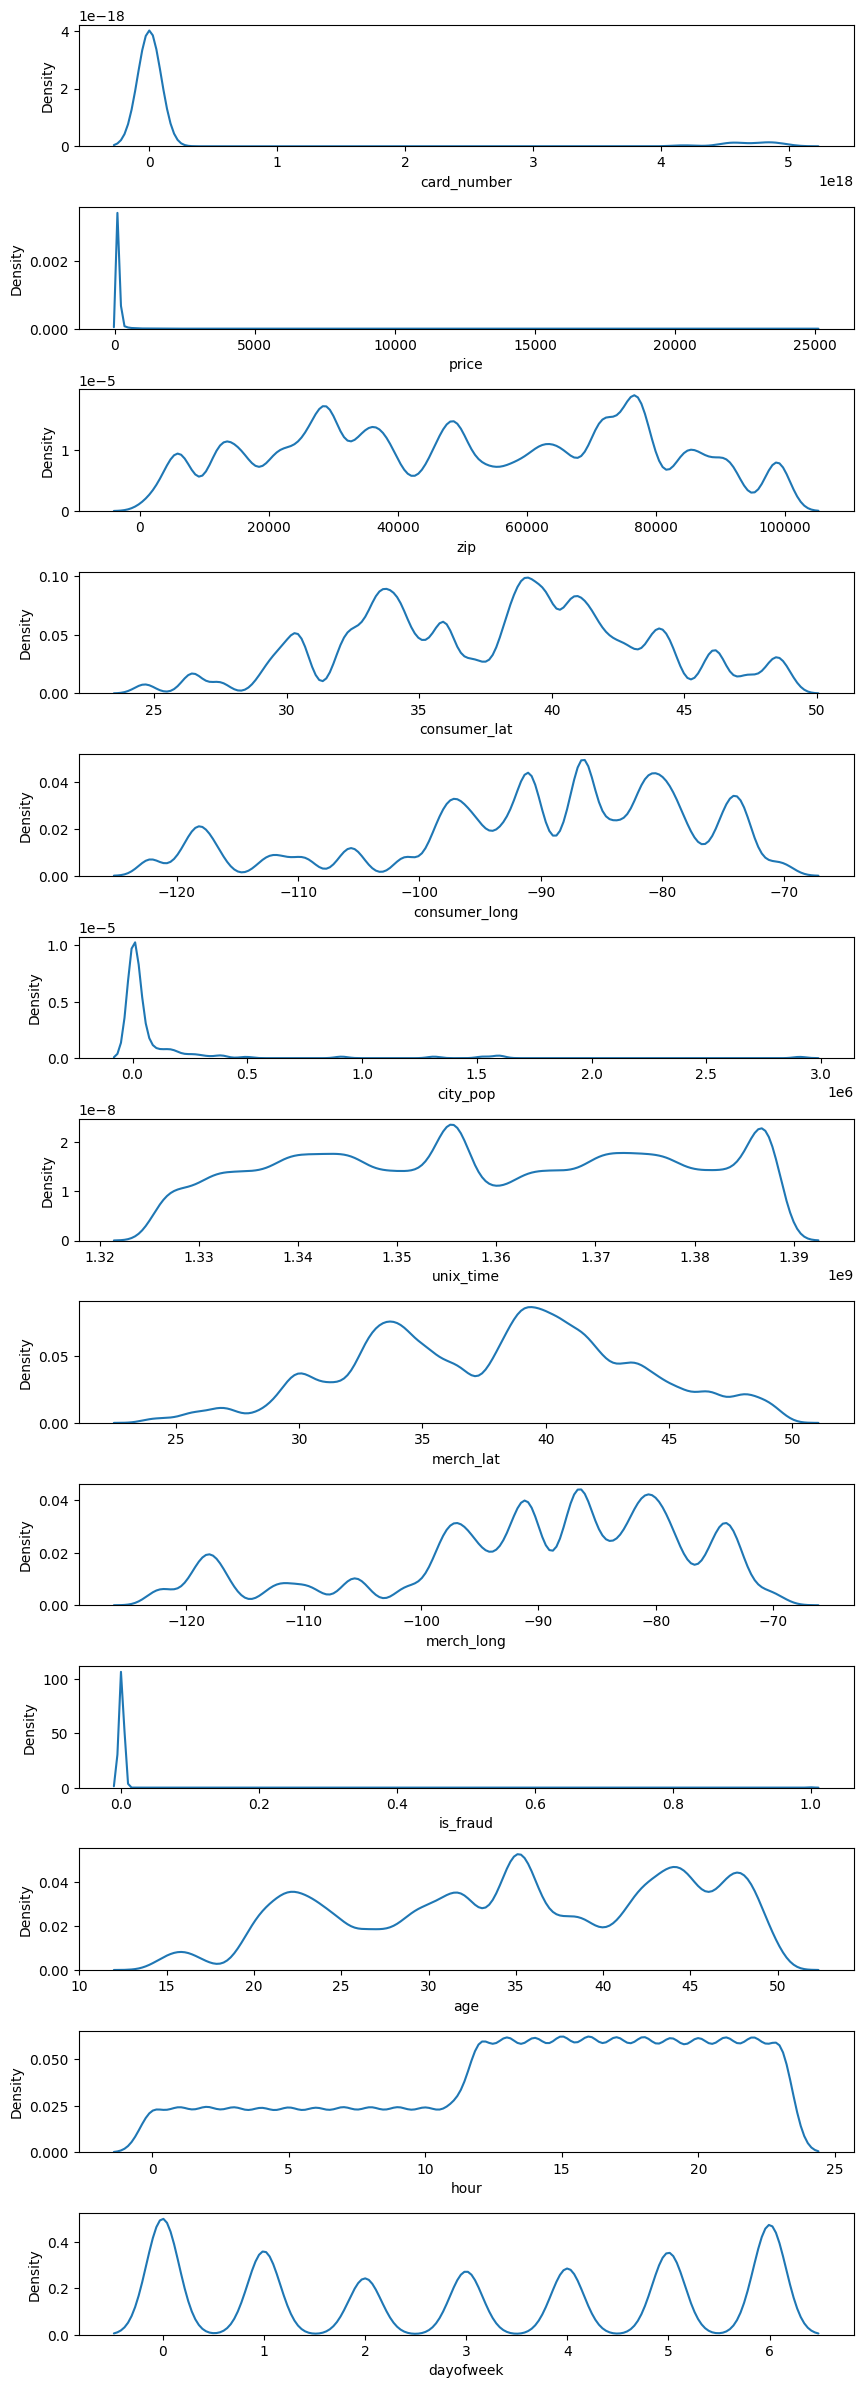

In [18]:
# 수치형인 피처들의 분포 시각화
fig, axes = plt.subplots(nrows = len(numeric_cols), ncols = 1, figsize=(10, 30))
sns.set(style="whitegrid")

for i, col in enumerate(numeric_cols):
  sns.kdeplot(fraud_date[col], ax = axes[i])
  plt.subplots_adjust(hspace=0.5)

plt.show()

- city_pop에 분포가 인구가 46명인 도시부터 약 290만 도시까지 넓게 분포되어있다. 이상치 확인할 때 살펴보기로 한다.
- 날짜 데이터는 모두 날짜를 나타내는 데이터가 들어갔다고 판단된다.
- 사람마다 가지고 있는 신용카드의 번호(card_number)가 다르며, 번호자리수가 길기 때문에 단위가 커서 그래프에 드러나지 않는다.
- zip은 우편번호를 나타내기 때문에 숫자의 크고 작음이 중요하지 않다.

따라서 card_number과 zip은 문자형으로 변환해준다.


In [19]:
# card_number과 zip을 문자형으로 변환
fraud['card_number'] = fraud['card_number'].astype(str)
fraud['zip'] = fraud['zip'].astype(str)

In [20]:
fraud.info()
fraud.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   payment_time   491134 non-null  datetime64[ns]
 1   card_number    491134 non-null  object        
 2   merchant       491134 non-null  object        
 3   category       491134 non-null  object        
 4   price          491134 non-null  float64       
 5   first_name     491134 non-null  object        
 6   last_name      491134 non-null  object        
 7   gender         491134 non-null  object        
 8   street         491134 non-null  object        
 9   city           491134 non-null  object        
 10  state          491134 non-null  object        
 11  zip            491134 non-null  object        
 12  consumer_lat   491134 non-null  float64       
 13  consumer_long  491134 non-null  float64       
 14  city_pop       491134 non-null  int64         
 15  

,payment_time,card_number,merchant,category,price,first_name,last_name,gender,street,city,state,zip,consumer_lat,consumer_long,city_pop,job,birthdate,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.531143,0,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.028747,0,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.454483,0,1


- cc_num, zip 모두 object형으로 바뀌었음이 확인된다.

### 문자형 피처에서 결측치 살펴보기

In [21]:
# 문자형 피처의 기술통계량
fraud.describe(include = 'object')

,card_number,merchant,category,first_name,last_name,gender,street,city,state,zip,job,trans_num
count,491134,491134,491134,491134,491134,491134,491134,491134,491134,491134,491134,491134
unique,124,693,14,92,102,2,124,121,44,124,110,491134
top,6538441737335434,fraud_Kilback LLC,shopping_pos,Margaret,Lowe,F,444 Robert Mews,Birmingham,TX,16114,Environmental consultant,1f76529f8574734946361c461b024d99
freq,4392,1602,48345,16029,16056,352445,4392,8029,49621,4392,8777,1


- 신용카드 번호와 우편번호, 도로명(street)가 모두 124인 것으로 보아 124개의 신용카드를 대상으로 집계한 기록임을 알 수 있다.
- trans_num은 거래번호이므로 모두 다른 범주를 가짐을 알 수 있다.
- 나머지 컬럼에서는 2개부터 693개의 범주로 다양하다.
- 모든 범주를 일일이 확인하기에 한계가 있으므로, 공백문자 입력개수, null, NaN값이 문자로 입력된 경우만 살펴본다.

In [22]:
# 문자형 피처의 각 컬럼의 범주에서 결측치 포함하는지 확인 #
fraud.select_dtypes(include = [object]).isin([['NaN', 'nan','Null', 'null', '']]).sum()

,0
card_number,0
merchant,0
category,0
first_name,0
last_name,0
gender,0
street,0
city,0
state,0
zip,0


- 문자형 피처에 결측치가 없음이 확인된다.

In [23]:
fraud.info()
fraud.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   payment_time   491134 non-null  datetime64[ns]
 1   card_number    491134 non-null  object        
 2   merchant       491134 non-null  object        
 3   category       491134 non-null  object        
 4   price          491134 non-null  float64       
 5   first_name     491134 non-null  object        
 6   last_name      491134 non-null  object        
 7   gender         491134 non-null  object        
 8   street         491134 non-null  object        
 9   city           491134 non-null  object        
 10  state          491134 non-null  object        
 11  zip            491134 non-null  object        
 12  consumer_lat   491134 non-null  float64       
 13  consumer_long  491134 non-null  float64       
 14  city_pop       491134 non-null  int64         
 15  

,payment_time,card_number,merchant,category,price,first_name,last_name,gender,street,city,state,zip,consumer_lat,consumer_long,city_pop,job,birthdate,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.531143,0,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.028747,0,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.454483,0,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,47.156742,0,1
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,41.856263,0,1


### 불필요한 피처 삭제
- first_name, last_name는 card_number로 식별이 가능하므로 삭제해준다.
- city, state, street, zip는 위도와 경도로 식별이 가능하므로 삭제해준다.
- merchant정보 역시 위도와 경도로 구별이 가능하므로 삭제해준다.
- birthdate도 나이도 구분이 가능하므로 삭제해준다.
- job에 따른 이상탐지의 가능성의 차이가 있다고 보기 어려워 삭제해준다.

In [24]:
# 불필요한 피처 삭제
fraud = fraud.drop(['first_name', 'last_name', 'city', 'state', 'street', 'zip', 'job', 'merchant', 'birthdate'], axis = 1)

In [25]:
fraud.head(3)

,payment_time,card_number,category,price,gender,consumer_lat,consumer_long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.531143,0,1
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.028747,0,1
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.454483,0,1


## 최종 데이터셋
---
category와 gender를 원핫인코딩해 최종데이터셋을 만들어준다.

In [26]:
# category와 gender에 대해 원핫인코딩 진행
final_fraud = pd.get_dummies(fraud , columns = ['category', 'gender'])

In [27]:
# 저장 데이터셋 확인
final_fraud.head(3)

,payment_time,card_number,price,consumer_lat,consumer_long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40.531143,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,38.028747,0,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,44.454483,0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
